## Problem One: Understanding the content of the competition

**What kind of company is Home Credit?**  
Home Credit is an international consumer finance provider that aims to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience to their users who may have insufficient or no credit history. They do so by making use of a variety of transactional information to predict a client's repayment abilities.

**What is expected in this competition?**  
The host, Home Credit, expects Kagglers to submit a machine learning model trained on their dataset that would be able to predict, at high accuracy, the probability that a client is capable of repaying loans.

**What are the benefits companies can gain by predicting this?**  
Companies will be able to ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calender that will empower their clients to be successful.

In [239]:
import pandas as pd
import seaborn as sns


df = pd.read_csv("application_train.csv")

## Problem Two: Understanding the overview of data

In [240]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [379]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [388]:
df.index.size

307511

In [389]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [378]:
df.isna().any().value_counts()

True     67
False    55
dtype: int64

In [244]:
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### Explanation
The dataset is made up of 307511 rows and 122 columns, with "SK_ID_CURR" serving as a unique ID for every row and "TARGET" representing wether or not a client repaid their loans on time. We can see that the variables in the dataset are either one of three data types, 65 are of float64 data type, 41 of int64 data type, and 16 of object. About 67 of the variables contain null values.

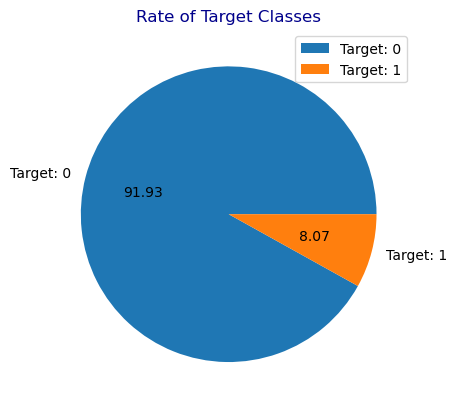

In [245]:
# Draw a graph showing the percentage of classes
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df.TARGET.value_counts(), labels=["Target: 0", "Target: 1"], autopct="%.2f")
plt.legend()
plt.title("Rate of Target Classes", c="darkblue")
plt.show()

### Explanation

The "TARGET" variable consists of two classes, with 0 representing the class of clients that had no issues repaying their loans on time, and 1 representing the class of clients that payment difficulties. From the Pie Chart, we see that 91.93% of the sample population repaid their loans on time, and 8.07% of the population had issues with repayment. Going by this, the chances of a client repaying their loans is quite high.

## Problem Three: Defining issues

The following are seven(7) questions We shall be answering in this notebook through exploratory data analysis:

1. What is the gender distribution with respect to the target classes?
2. How does one's family status affect their repayment tendencies?
3. What is the distribution of occupation types in the data and how does it relate with repayment difficulties?
4. What is the age distribution according of repayment on time?
5. How does car ownership perform with respect to repayment difficulties?
6. Can Home Credit's rating of the region where the client lives be considered a major predicting factor of clients' repayment habits?
7. How does education level perform with respect to repayment difficulties?

## Problem Four: Data exploration

In [390]:
# Creating functions to analyze and plot the data for reusability

def analyze(data, feature):
    feature_by_target0 = data[data.TARGET == 0][feature].value_counts()   
    feature_by_target1 = data[data.TARGET == 1][feature].value_counts()   
    return feature_by_target0, feature_by_target1

    
def compute_rates(feature):
    repayment_rates = 1 - df[[feature, "TARGET"]].groupby([feature], as_index=True).mean().round(2)
    return repayment_rates

    
def visualize(data1, data2, plot_type="bar", color1="teal", color2="#f975ae", width=None, title1=None, title2=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,4))
    
    if plot_type == "histplot":
        sns.histplot(data1, kde=True, color=color1, ax=ax1,)
        ax1.set_title(title1)
        
        sns.histplot(data2, kde=True, color=color2, ax=ax2)
        ax2.set_title(title2)
        plt.show()
    else:
        chart_method1 = getattr(ax1, plot_type)
        chart_method2 = getattr(ax2, plot_type)



        chart_method1(data1.index, data1.values, color =color1)
        ax1.set_title(title1)
        
        chart_method2(data2.index, data2.values, color =color2)
        ax2.set_title(title2)
        
        plt.tight_layout()
        plt.show()

### What is the gender distribution with respect to the target classes?

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

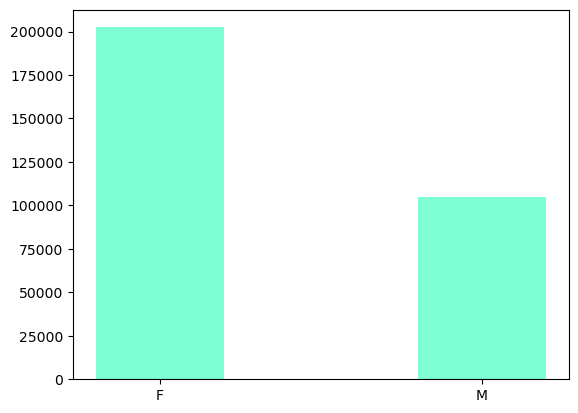

In [394]:
display(df.CODE_GENDER.value_counts())

plt.bar(df.CODE_GENDER.value_counts().keys()[:2], df.CODE_GENDER.value_counts().values[:2], color ='aquamarine', 
        width = 0.4)
plt.show()

In [308]:
# displaying a cross of clients without repayment difficulties and gender
gender_by_target0, gender_by_target1 = analyze(df, "CODE_GENDER")
display(gender_by_target0)

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64

In [314]:
# displaying a cross of clients with repayment difficulties and gender
display(gender_by_target1)

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

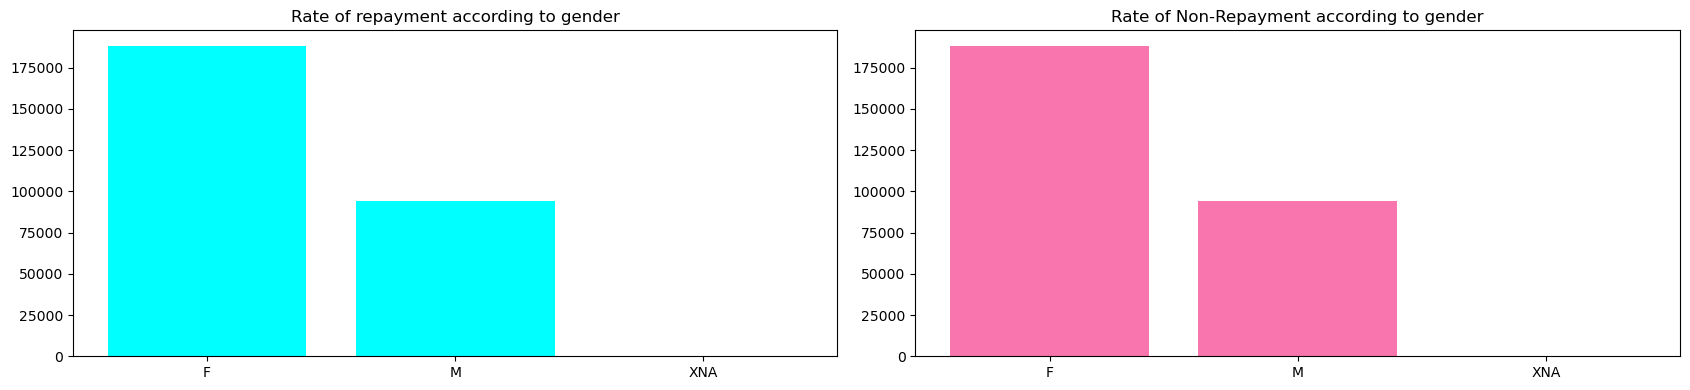

In [315]:
gender_by_target0, gender_by_target1 = analyze(df, "CODE_GENDER")
visualize(gender_by_target0, gender_by_target0, plot_type="bar", color1="aqua", width=0.4, title1="Amount of repayment according to gender",
         title2="Amount of Non-Repayment according to gender")

In [316]:
compute_rates("CODE_GENDER")

,TARGET
CODE_GENDER,
F,0.93
M,0.90
XNA,1.00


### Findings
There are a total of 202448 identified females in the data set, 105059 males, and 4 clients with their sex unidentified. Among these 202448 females, 188278 repaid their loans on time, and 14170 didn't, this means that 93% of the females repaid their debts without difficulties. While, out of the 105059 total males, 94404 of them repaid their loans on time, putting the rate of loan repayment for males at 90%.

### How does one's family status affect their repayment tendencies?

In [401]:
family_status_by_target0, family_status_by_target1 = analyze(df, "NAME_FAMILY_STATUS")

# displaying a cross of clients without repayment difficulties and their family status
display(family_status_by_target0)

Married                 181582
Single / not married     40987
Civil marriage           26814
Separated                18150
Widow                    15151
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [320]:
# displaying a cross of clients with repayment difficulties and their family status
display(family_status_by_target1)

Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64

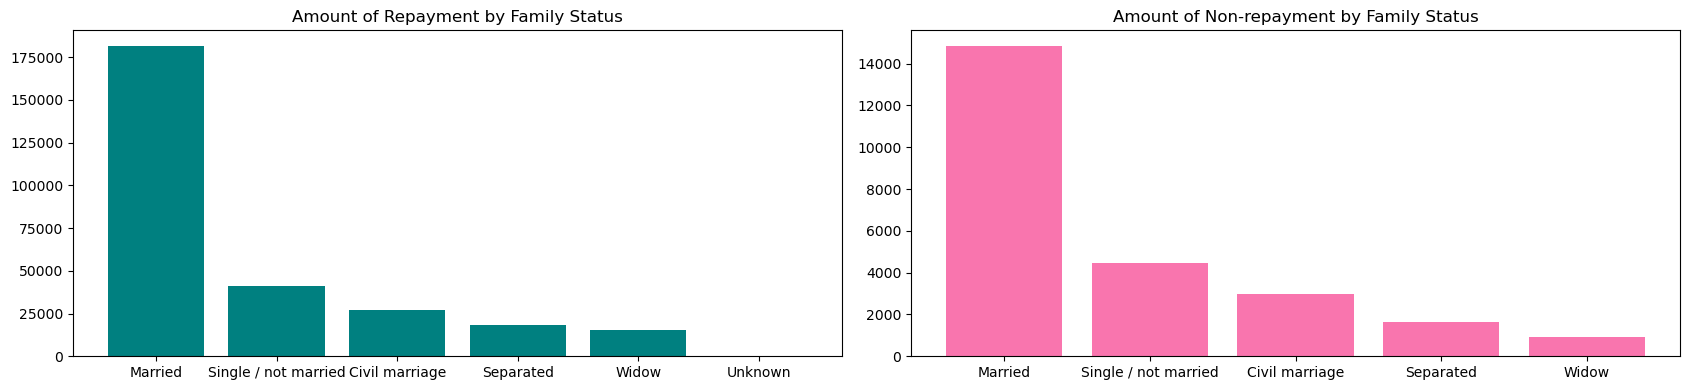

In [323]:
visualize(family_status_by_target0, family_status_by_target1, title1="Amount of Repayment by Family Status",
         title2="Amount of Non-repayment by Family Status")

In [399]:
compute_rates("NAME_FAMILY_STATUS").sort_values(by="TARGET", ascending=False)

,TARGET
NAME_FAMILY_STATUS,
Unknown,1.00
Widow,0.94
Married,0.92
Separated,0.92
Civil marriage,0.90
Single / not married,0.90


### Findings
Asides the two clients with unidentified family status, Widows have the highest rate of repayment without issues, with married coming in second, but family status doesn't seem to greatly affect the repayment rates

### What is the distribution of occupation types in the data and how does it relate with repayment difficulties?

In [328]:
occupation_by_target0, occupation_by_target1 = analyze(df, "OCCUPATION_TYPE")

# displaying a cross of clients without repayment difficulties and occupation types
occupation_by_target0

Laborers                 49348
Sales staff              29010
Core staff               25832
Managers                 20043
Drivers                  16496
High skill tech staff    10679
Accountants               9339
Medicine staff            7965
Security staff            5999
Cooking staff             5325
Cleaning staff            4206
Private service staff     2477
Low-skill Laborers        1734
Secretaries               1213
Waiters/barmen staff      1196
Realty agents              692
HR staff                   527
IT staff                   492
Name: OCCUPATION_TYPE, dtype: int64

In [363]:
# displaying a cross of clients with repayment difficulties and occupation types
occupation_by_target1

Laborers                 5838
Sales staff              3092
Drivers                  2107
Core staff               1738
Managers                 1328
Security staff            722
High skill tech staff     701
Cooking staff             621
Medicine staff            572
Accountants               474
Cleaning staff            447
Low-skill Laborers        359
Private service staff     175
Waiters/barmen staff      152
Secretaries                92
Realty agents              59
HR staff                   36
IT staff                   34
Name: OCCUPATION_TYPE, dtype: int64

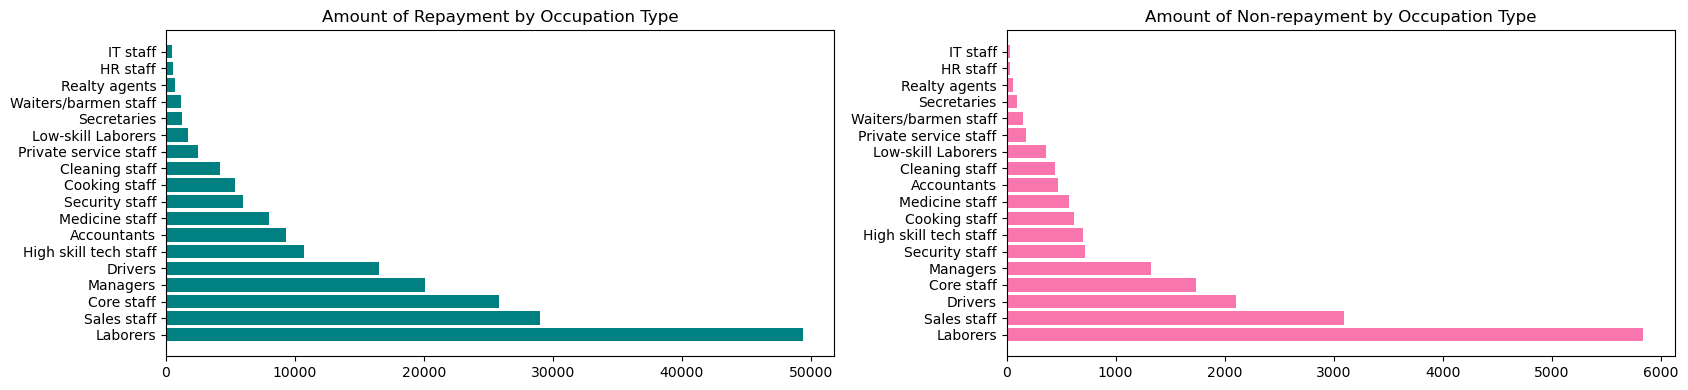

In [364]:
visualize(occupation_by_target0, occupation_by_target1, plot_type="barh", 
          title1="Amount of Repayment by Occupation Type",
         title2="Amount of Non-repayment by Occupation Type")

In [365]:
compute_rates("OCCUPATION_TYPE").sort_values(by="TARGET", ascending=False)

,TARGET
OCCUPATION_TYPE,
Accountants,0.95
Core staff,0.94
HR staff,0.94
High skill tech staff,0.94
IT staff,0.94
Managers,0.94
Secretaries,0.93
Medicine staff,0.93
Private service staff,0.93


### Findings
The analysis reveals that clients working corporate jobs, e.g. accountants, Core staff, HR staff, managers, etc., have the highest repayment rates than those working manual jobs, e.g., labourers, drivers, security staff, etc.

### What is the age distribution according of repayment on time?

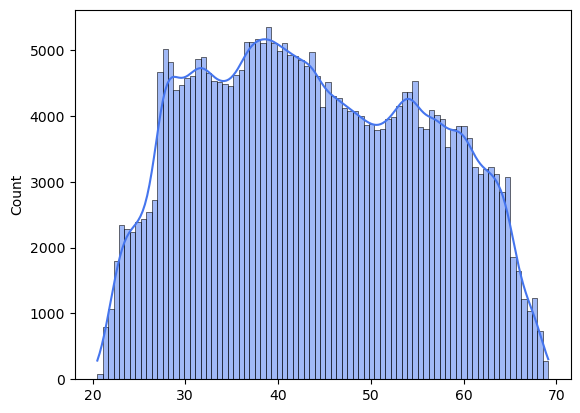

In [329]:
# Showing the general age distribution

sns.histplot(abs(df.DAYS_BIRTH.values/365), kde=True, color="#4575ee")
plt.show()

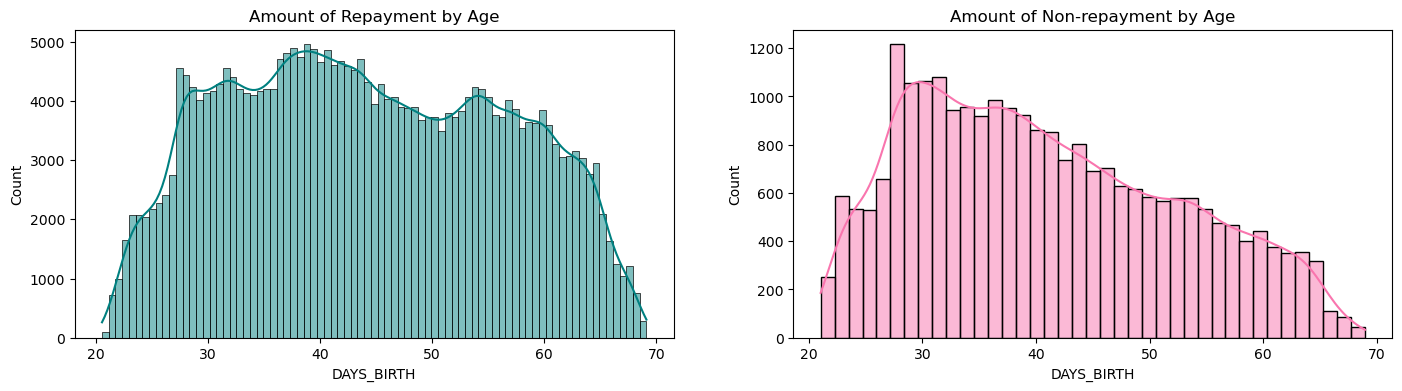

In [340]:
age_dist_target0 = abs(df.loc[df["TARGET"] == 0, "DAYS_BIRTH"]/365)
age_dist_target1 = abs(df.loc[df["TARGET"] == 1, "DAYS_BIRTH"]/365)
visualize(age_dist_target0, age_dist_target1, plot_type="histplot", 
         title1="Amount of Repayment by Age",
         title2="Amount of Non-repayment by Age")

### Findings
The highest count of clients who repaid their loans on time are clients in their early 40s, the distribution shows that the clients older than 40 have higher records of repayment without difficulites than those younger than 40.

### How does car ownership perform with respect to repayment difficulties?

In [350]:
car_ownership_target0, car_ownership_target1 = analyze(df, "FLAG_OWN_CAR")

# displaying a cross of clients without repayment difficulties and car ownership
car_ownership_target0

N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64

In [351]:
# displaying a cross of clients with repayment difficulties and car ownership

car_ownership_target1

N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64

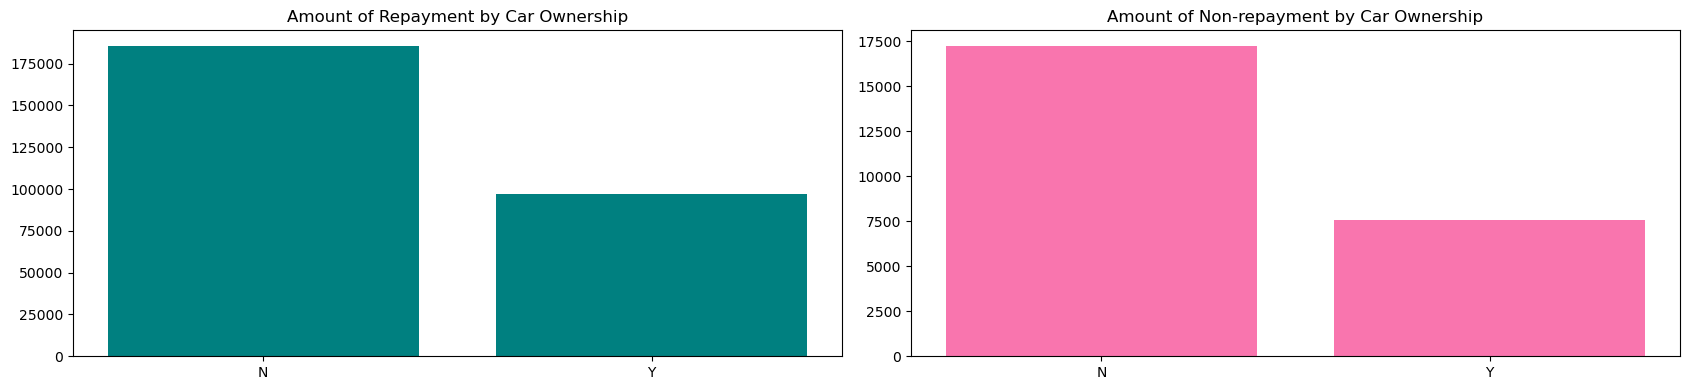

In [354]:
visualize(car_ownership_target0, car_ownership_target1, plot_type="bar", 
          title1="Amount of Repayment by Car Ownership",
         title2="Amount of Non-repayment by Car Ownership")

In [400]:
compute_rates("FLAG_OWN_CAR")

,TARGET
FLAG_OWN_CAR,
N,0.91
Y,0.93


### Findings
Since the rate of repayment without difficulties for car owners is higher than that of the clients without cars by 0.02%, we can conclude that the payment rate of clients isn't greatly affected by car ownership.

### Can Home Credit's rating of the region where the client lives be considered a major predicting factor of clients' repayment habits?

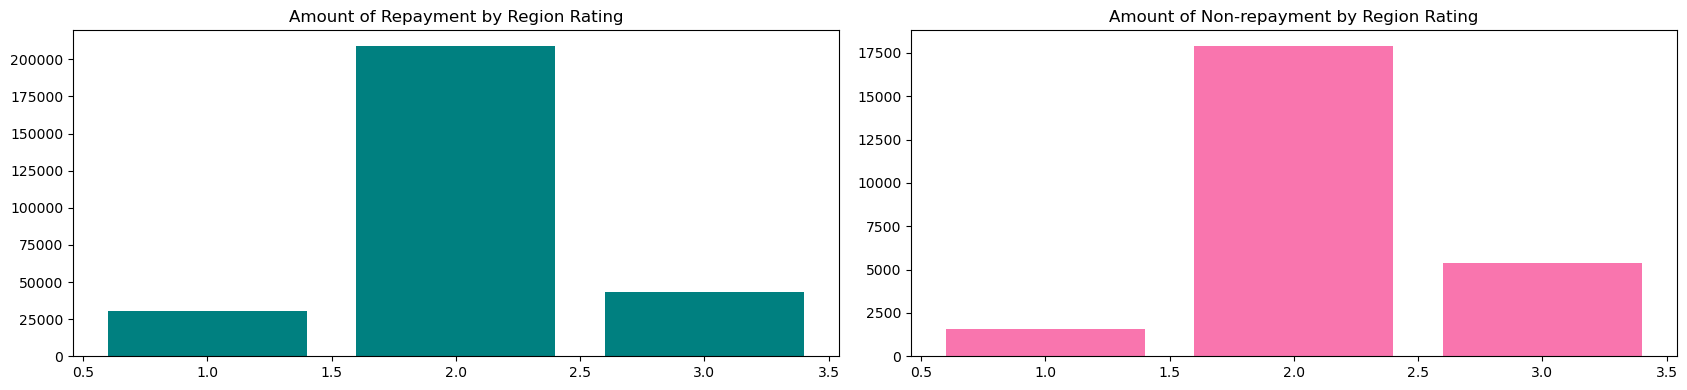

In [355]:
region_rating_target0, region_rating_target1 = analyze(df, "REGION_RATING_CLIENT")
visualize(region_rating_target0, region_rating_target1, plot_type="bar",
         title1="Amount of Repayment by Region Rating",
         title2="Amount of Non-repayment by Region Rating")

In [348]:
compute_rates("REGION_RATING_CLIENT")

,TARGET
REGION_RATING_CLIENT,
1,0.95
2,0.92
3,0.89


### Findings
Considering that the rate of repayment of loans for clients appears to be decreasing as the region ratings increase, Home Credit's rating of the client's region could be said to inversely affect the client's repayment habits, and considering that the difference between clients of each rating is 0.03%, there isn't much proof to suggest that the region rating could be considered a major predicting factor of clients' repayment habits.

### How does education level perform with respect to repayment difficulties?

In [372]:
education_by_target0, education_by_target1 = analyze(df, "NAME_EDUCATION_TYPE")

# displaying a cross of clients without repayment difficulties and education types
education_by_target0

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64

In [373]:
# displaying a cross of clients with repayment difficulties and education types
education_by_target1

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

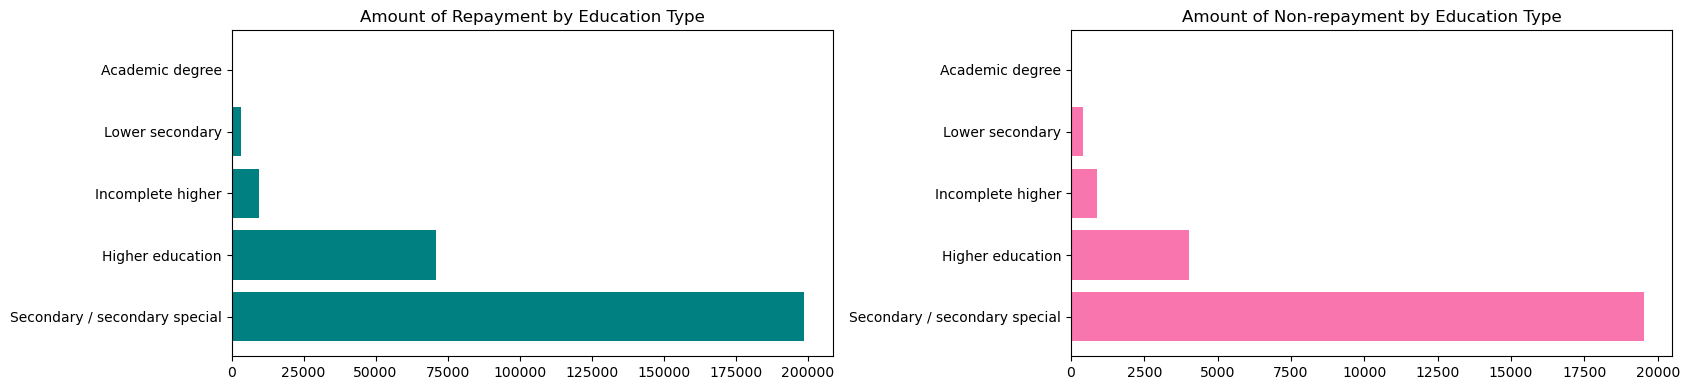

In [374]:
visualize(education_by_target0, education_by_target1, plot_type="barh", 
          title1="Amount of Repayment by Education Type",
         title2="Amount of Non-repayment by Education Type")

In [375]:
compute_rates("NAME_EDUCATION_TYPE").sort_values(by="TARGET", ascending=False)

,TARGET
NAME_EDUCATION_TYPE,
Academic degree,0.98
Higher education,0.95
Incomplete higher,0.92
Secondary / secondary special,0.91
Lower secondary,0.89


### Findings
The analysis suggests that clients' education level has a positive correlation with the rate of repayment of their loans.

## Problem Five: (Advanced task) Posting to Notebooks

**https://www.kaggle.com/code/andernoja/home-credit-default-risk-analysis**